In [3]:
import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext("local", "pyspark-shell")

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.sql.types import StructField, StructType, LongType, StringType, DoubleType
a = StructType([StructField("NO",LongType(),True),StructField("MLSID",StringType(),True),StructField("STREETNUMBERNUMERIC",LongType(),True),StructField("STREETADDRESS",StringType(),True),StructField("STREETNAME",StringType(),True),StructField("POSTALCODE",LongType(),True),StructField("STATEORPROVINCE",StringType(),True),StructField("CITY",StringType(),True),StructField("SALESCLOSEPRICE",LongType(),True),StructField("LISTDATE",StringType(),True),StructField("LISTPRICE",LongType(),True),StructField("LISTTYPE",StringType(),True),StructField("ORIGINALLISTPRICE",LongType(),True),StructField("PRICEPERTSFT",DoubleType(),True),StructField("FOUNDATIONSIZE",LongType(),True),StructField("FENCE",StringType(),True),StructField("MAPLETTER",StringType(),True),StructField("LOTSIZEDIMENSIONS",StringType(),True),StructField("SCHOOLDISTRICTNUMBER",StringType(),True),StructField("DAYSONMARKET",LongType(),True),StructField("OFFMARKETDATE",StringType(),True),StructField("FIREPLACES",LongType(),True),StructField("ROOMAREA4",StringType(),True),StructField("ROOMTYPE",StringType(),True),StructField("ROOF",StringType(),True),StructField("ROOMFLOOR4",StringType(),True),StructField("POTENTIALSHORTSALE",StringType(),True),StructField("POOLDESCRIPTION",StringType(),True),StructField("PDOM",LongType(),True),StructField("GARAGEDESCRIPTION",StringType(),True),StructField("SQFTABOVEGROUND",LongType(),True),StructField("TAXES",LongType(),True),StructField("ROOMFLOOR1",StringType(),True),StructField("ROOMAREA1",StringType(),True),StructField("TAXWITHASSESSMENTS",DoubleType(),True),StructField("TAXYEAR",LongType(),True),StructField("LIVINGAREA",LongType(),True),StructField("UNITNUMBER",StringType(),True),StructField("YEARBUILT",LongType(),True),StructField("ZONING",StringType(),True),StructField("STYLE",StringType(),True),StructField("ACRES",DoubleType(),True),StructField("COOLINGDESCRIPTION",StringType(),True),StructField("APPLIANCES",StringType(),True),StructField("BACKONMARKETDATE",DoubleType(),True),StructField("ROOMFAMILYCHAR",StringType(),True),StructField("ROOMAREA3",StringType(),True),StructField("EXTERIOR",StringType(),True),StructField("ROOMFLOOR3",StringType(),True),StructField("ROOMFLOOR2",StringType(),True),StructField("ROOMAREA2",StringType(),True),StructField("DININGROOMDESCRIPTION",StringType(),True),StructField("BASEMENT",StringType(),True),StructField("BATHSFULL",LongType(),True),StructField("BATHSHALF",LongType(),True),StructField("BATHQUARTER",LongType(),True),StructField("BATHSTHREEQUARTER",DoubleType(),True),StructField("CLASS",StringType(),True),StructField("BATHSTOTAL",LongType(),True),StructField("BATHDESC",StringType(),True),StructField("ROOMAREA5",StringType(),True),StructField("ROOMFLOOR5",StringType(),True),StructField("ROOMAREA6",StringType(),True),StructField("ROOMFLOOR6",StringType(),True),StructField("ROOMAREA7",StringType(),True),StructField("ROOMFLOOR7",StringType(),True),StructField("ROOMAREA8",StringType(),True),StructField("ROOMFLOOR8",StringType(),True),StructField("BEDROOMS",LongType(),True),StructField("SQFTBELOWGROUND",LongType(),True),StructField("ASSUMABLEMORTGAGE",StringType(),True),StructField("ASSOCIATIONFEE",LongType(),True),StructField("ASSESSMENTPENDING",StringType(),True),StructField("ASSESSEDVALUATION",DoubleType(),True)])
df = spark.read.csv("Real_Estate.csv", header=True, schema=a)

# Building a Model

## Choosing the Algorithm

This flowchart can help us navigate what's available in PySpark's machine learning library for dataframes, ML.

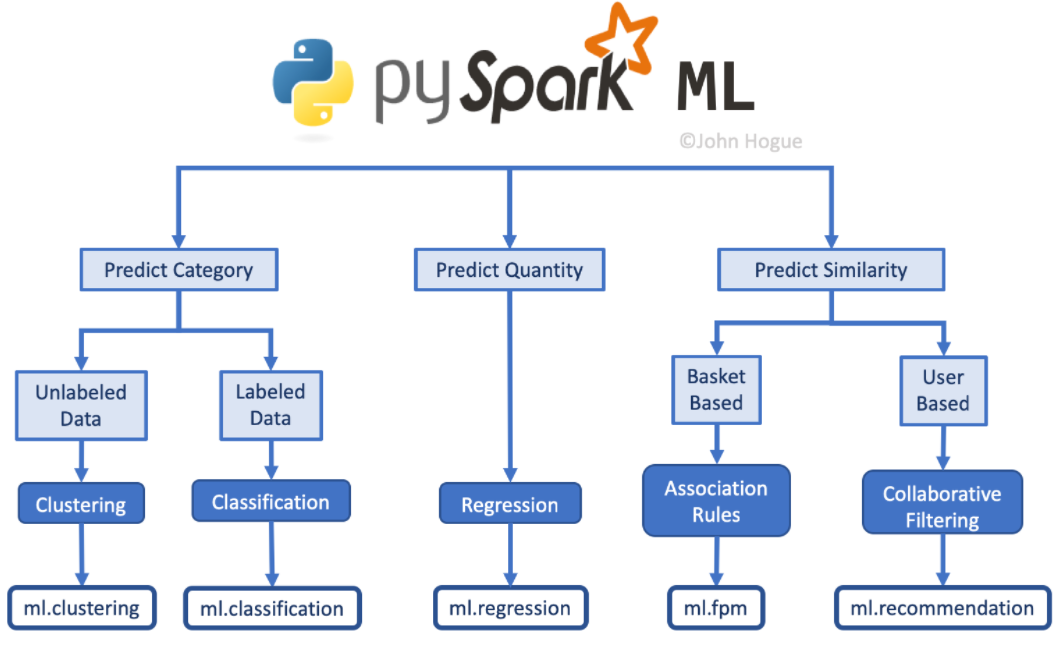

The price of a home will be predicted. This price is a quantity and continuous. That takes us to the Regression archetype, which predicts continouos values. ML regression provides us with many different algorithms. Regression methods differ mostly in how they regularize, which means how to prevent from finding overly complex solutions that are likely to overfit the data. They are powerful but require a lot of upfront work to ensure their assumptions. ML regression also contains tree-based methods which have the ability to easily handle missing and categorical values right out of the box. Decision trees are easy to interpret but a lot of work needs to go in to prevent overfitting. 

Splitting data is crucial, but when data contains time component splitting randomly would leak information about what happens in the future. To prevent this you can split data sequentially. Walk-Forward Optimization for Time-Series.

### Creating Time Splits

Data shape and type handling:

In [2]:
from pyspark.sql.functions import split, format_string, concat_ws, to_timestamp
df = df.withColumn("LISTDATE1", split(df.LISTDATE, " ")[0])
df = df.withColumn("OFFMARKETDATE1", split(df.OFFMARKETDATE, " ")[0])

df = df.withColumn("day", split(df.LISTDATE1, "/")[0])
df = df.withColumn("month", split(df.LISTDATE1, "/")[1])
df = df.withColumn("year", split(df.LISTDATE1, "/")[2])
df = df.withColumn("marketday", split(df.OFFMARKETDATE1, "/")[0])
df = df.withColumn("marketmonth", split(df.OFFMARKETDATE1, "/")[1])
df = df.withColumn("marketyear", split(df.OFFMARKETDATE1, "/")[2])

df = df.withColumn("day", df.day.cast("int"))
df = df.withColumn("month", df.month.cast("int"))
df = df.withColumn("day",format_string("%02d", "day"))
df = df.withColumn("month",format_string("%02d", "month"))
df = df.withColumn("marketday", df.marketday.cast("int"))
df = df.withColumn("marketmonth", df.marketmonth.cast("int"))
df = df.withColumn("marketday",format_string("%02d", "marketday"))
df = df.withColumn("marketmonth",format_string("%02d", "marketmonth"))

df = df.withColumn("day", df.day.cast("string"))
df = df.withColumn("month", df.month.cast("string"))
df = df.withColumn( "a",concat_ws('/',df.month,df.day,df.year))
df = df.withColumn("LISTDATE", to_timestamp("a","dd/MM/yyyy"))
df = df.withColumn("marketday", df.marketday.cast("string"))
df = df.withColumn("marketmonth", df.marketmonth.cast("string"))
df = df.withColumn( "b",concat_ws('/',df.marketmonth,df.marketday,df.marketyear))
df = df.withColumn("OFFMARKETDATE", to_timestamp("b","dd/MM/yyyy"))

df = df.drop(*["a", "day","year", "month", "LISTDATE1", "b", "marketday", "marketyear", "marketmonth", "OFFMARKETDATE1"])

df_dates = df.select("OFFMARKETDATE","DAYSONMARKET", "LISTDATE")

In [3]:
from datetime import timedelta
def train_test_split_date(df, split_col, test_days=45):
    max_date = df_dates.agg({split_col: "max"}).collect()[0][0]
    min_date = df_dates.agg({split_col: "min"}).collect()[0][0]
    split_date = max_date - timedelta(days=test_days)
    return split_date

split_date = train_test_split_date(df_dates, "OFFMARKETDATE")
train_df = df_dates.where(df_dates["OFFMARKETDATE"] < split_date)
test_df = df_dates.where(df_dates["OFFMARKETDATE"] >= split_date).where(df_dates["LISTDATE"] <= split_date)


In [4]:
print(train_df.count(), test_df.count())

4828 154


### Adjusting Time Features

In [5]:
split_date = df_dates.agg({"OFFMARKETDATE": "max"}).collect()[0][0]- timedelta(days=45)
print(split_date)

from pyspark.sql.functions import datediff, to_date, lit
split_date = to_date(lit('2017-12-10'))

test_df = df_dates.where(df_dates["OFFMARKETDATE"] >= split_date).where(df_dates["LISTDATE"] <= split_date)
test_df = test_df.withColumn("DAYSONMARKET_Original", test_df["DAYSONMARKET"])
test_df = test_df.withColumn("DAYSONMARKET", datediff(split_date, "LISTDATE"))
test_df[["LISTDATE", "OFFMARKETDATE", "DAYSONMARKET_Original", "DAYSONMARKET"]].show()

2017-12-10 00:00:00
+-------------------+-------------------+---------------------+------------+
|           LISTDATE|      OFFMARKETDATE|DAYSONMARKET_Original|DAYSONMARKET|
+-------------------+-------------------+---------------------+------------+
|2017-10-06 00:00:00|2018-01-24 00:00:00|                  110|          65|
|2017-09-18 00:00:00|2017-12-12 00:00:00|                   82|          83|
|2017-11-07 00:00:00|2017-12-12 00:00:00|                   35|          33|
|2017-10-30 00:00:00|2017-12-11 00:00:00|                   42|          41|
|2017-07-14 00:00:00|2017-12-19 00:00:00|                  158|         149|
|2017-10-25 00:00:00|2017-12-20 00:00:00|                   45|          46|
|2017-12-07 00:00:00|2017-12-23 00:00:00|                   16|           3|
|2017-11-22 00:00:00|2017-12-16 00:00:00|                   24|          18|
|2017-10-27 00:00:00|2017-12-13 00:00:00|                   47|          44|
|2017-09-29 00:00:00|2017-12-12 00:00:00|               

## Feature Engineering Assumptions for RFR

The lack of assumptions needed for Random Forest Regression make it and its related methods some of the most popular choices for prediction continuous values. Random Forestes are able to work with non-normally distributed data or data that is unscaled. Missing and categorical data can be handled very easily with value replacements. 

PySpark ML algorithms require all of the features to be provided in a single column of type vector. Use VectorAssambler. A vector should contain fuatures only. So you need to remove your dependent variable before converting to a vector.

### Dropping Columns with Low Observations

In [12]:
from pyspark.sql.functions import explode
from pyspark.sql.functions import coalesce, first, lit

fence_df = df.withColumn("FENCE_list", split("FENCE", ", "))
fence_df = fence_df.withColumn("ex_FENCE_list", explode("FENCE_list"))
fence_df = fence_df.withColumn("constant_val", lit(1))
piv_df = fence_df.groupBy("NO").pivot("ex_FENCE_list").agg(coalesce(first("constant_val")))

col_names = fence_df.select("ex_FENCE_list").distinct().toPandas().values
for i in col_names:
    piv_df = piv_df.withColumnRenamed(i[0], "FENCE_"+i[0])
    
piv_df = piv_df.fillna(0)

In [24]:
obs_threshold = 30
cols_to_remove = list()

col_names = piv_df.columns[1:]

for col in col_names:
    obs_count = piv_df.agg({col: "sum"}).collect()[0][0]
    if obs_count <= obs_threshold:
        cols_to_remove.append(col)

new_df = piv_df.drop(*cols_to_remove)

print('Rows: ' + str(piv_df.count()) + ' Columns: ' + str(len(piv_df.columns)))
print('Rows: ' + str(new_df.count()) + ' Columns: ' + str(len(new_df.columns)))

Rows: 2972 Columns: 12
Rows: 2972 Columns: 10


### Naively Handling Missing and Categorical Values

In [25]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline 

categorical_cols = ['CITY',
 'LISTTYPE',
 'SCHOOLDISTRICTNUMBER',
 'POTENTIALSHORTSALE',
 'STYLE',
 'ASSUMABLEMORTGAGE',
 'ASSESSMENTPENDING']

indexers = [StringIndexer(inputCol=col, outputCol=col+"_IDX").setHandleInvalid("keep") for  col in categorical_cols]

indexer_pipeline = Pipeline(stages=indexers)
df_indexed = indexer_pipeline.fit(df).transform(df)
df_indexed = df_indexed.drop(*categorical_cols)
print(df_indexed.select('CITY_IDX','LISTTYPE_IDX','SCHOOLDISTRICTNUMBER_IDX','POTENTIALSHORTSALE_IDX','STYLE_IDX','ASSUMABLEMORTGAGE_IDX','ASSESSMENTPENDING_IDX').dtypes)

[('CITY_IDX', 'double'), ('LISTTYPE_IDX', 'double'), ('SCHOOLDISTRICTNUMBER_IDX', 'double'), ('POTENTIALSHORTSALE_IDX', 'double'), ('STYLE_IDX', 'double'), ('ASSUMABLEMORTGAGE_IDX', 'double'), ('ASSESSMENTPENDING_IDX', 'double')]


## Building a Model

After evaluating the model we need to evaluate the predicted results by using the RegressionEvaluator. 

In [186]:
a = StructType([StructField("NO",LongType(),True),StructField("MLSID",StringType(),True),StructField("STREETNUMBERNUMERIC",LongType(),True),StructField("STREETADDRESS",StringType(),True),StructField("STREETNAME",StringType(),True),StructField("POSTALCODE",LongType(),True),StructField("STATEORPROVINCE",StringType(),True),StructField("CITY",StringType(),True),StructField("SALESCLOSEPRICE",LongType(),True),StructField("LISTDATE",StringType(),True),StructField("LISTPRICE",LongType(),True),StructField("LISTTYPE",StringType(),True),StructField("ORIGINALLISTPRICE",LongType(),True),StructField("PRICEPERTSFT",DoubleType(),True),StructField("FOUNDATIONSIZE",LongType(),True),StructField("FENCE",StringType(),True),StructField("MAPLETTER",StringType(),True),StructField("LOTSIZEDIMENSIONS",StringType(),True),StructField("SCHOOLDISTRICTNUMBER",StringType(),True),StructField("DAYSONMARKET",LongType(),True),StructField("OFFMARKETDATE",StringType(),True),StructField("FIREPLACES",LongType(),True),StructField("ROOMAREA4",StringType(),True),StructField("ROOMTYPE",StringType(),True),StructField("ROOF",StringType(),True),StructField("ROOMFLOOR4",StringType(),True),StructField("POTENTIALSHORTSALE",StringType(),True),StructField("POOLDESCRIPTION",StringType(),True),StructField("PDOM",LongType(),True),StructField("GARAGEDESCRIPTION",StringType(),True),StructField("SQFTABOVEGROUND",LongType(),True),StructField("TAXES",LongType(),True),StructField("ROOMFLOOR1",StringType(),True),StructField("ROOMAREA1",StringType(),True),StructField("TAXWITHASSESSMENTS",DoubleType(),True),StructField("TAXYEAR",LongType(),True),StructField("LIVINGAREA",LongType(),True),StructField("UNITNUMBER",StringType(),True),StructField("YEARBUILT",LongType(),True),StructField("ZONING",StringType(),True),StructField("STYLE",StringType(),True),StructField("ACRES",DoubleType(),True),StructField("COOLINGDESCRIPTION",StringType(),True),StructField("APPLIANCES",StringType(),True),StructField("BACKONMARKETDATE",DoubleType(),True),StructField("ROOMFAMILYCHAR",StringType(),True),StructField("ROOMAREA3",StringType(),True),StructField("EXTERIOR",StringType(),True),StructField("ROOMFLOOR3",StringType(),True),StructField("ROOMFLOOR2",StringType(),True),StructField("ROOMAREA2",StringType(),True),StructField("DININGROOMDESCRIPTION",StringType(),True),StructField("BASEMENT",StringType(),True),StructField("BATHSFULL",LongType(),True),StructField("BATHSHALF",LongType(),True),StructField("BATHQUARTER",LongType(),True),StructField("BATHSTHREEQUARTER",DoubleType(),True),StructField("CLASS",StringType(),True),StructField("BATHSTOTAL",LongType(),True),StructField("BATHDESC",StringType(),True),StructField("ROOMAREA5",StringType(),True),StructField("ROOMFLOOR5",StringType(),True),StructField("ROOMAREA6",StringType(),True),StructField("ROOMFLOOR6",StringType(),True),StructField("ROOMAREA7",StringType(),True),StructField("ROOMFLOOR7",StringType(),True),StructField("ROOMAREA8",StringType(),True),StructField("ROOMFLOOR8",StringType(),True),StructField("BEDROOMS",LongType(),True),StructField("SQFTBELOWGROUND",LongType(),True),StructField("ASSUMABLEMORTGAGE",StringType(),True),StructField("ASSOCIATIONFEE",LongType(),True),StructField("ASSESSMENTPENDING",StringType(),True),StructField("ASSESSEDVALUATION",DoubleType(),True)])
df = spark.read.csv("Real_Estate.csv", header=True, schema=a)
df = df.withColumnRenamed("NO", "INDEX")

In [187]:
from pyspark.sql.functions import format_string, concat_ws, to_date, dayofyear, dayofmonth, weekofyear, year, month

df = df.withColumn("LISTDATE", split(df.LISTDATE, " ")[0])

df = df.withColumn("day", split(df.LISTDATE, "/")[0])
df = df.withColumn("month", split(df.LISTDATE, "/")[1])
df = df.withColumn("year", split(df.LISTDATE, "/")[2])

df = df.withColumn("day", df.day.cast("int"))
df = df.withColumn("month", df.month.cast("int"))
df = df.withColumn("day",format_string("%02d", "day"))
df = df.withColumn("month",format_string("%02d", "month"))

df = df.withColumn("day", df.day.cast("string"))
df = df.withColumn("month", df.month.cast("string"))
df = df.withColumn( "a",concat_ws('/',df.day,df.month,df.year))
df = df.withColumn( "a",concat_ws('/',df.month,df.day,df.year))
df = df.withColumn("LISTDATE", to_date("a","dd/MM/yyyy"))

from pyspark.sql.functions import lag, to_date
from pyspark.sql.window import Window

mort_df = spark.read.csv("mort.csv",header=True)
mort_df = mort_df.withColumn("DATE", to_date("DATE","yyyy-MM-dd"))
mort_df = mort_df.withColumn("MORTGAGE30US", mort_df.MORTGAGE30US.cast("int"))
w = Window().orderBy(mort_df["DATE"])

mort_df = mort_df.withColumn("MORTGAGE30US-1w", lag("MORTGAGE30US", 1).over(w))
mort_df = mort_df.withColumn("MORTGAGE30US-2w", lag("MORTGAGE30US-1w", 1).over(w))
mort_df = mort_df.withColumn("MORTGAGE30US-3w", lag("MORTGAGE30US-2w", 1).over(w))
mort_df = mort_df.withColumn("MORTGAGE30US-4w", lag("MORTGAGE30US-3w", 1).over(w))
mort_df = mort_df.withColumnRenamed("DATE", "LISTDATE")
df = df.join(mort_df, on = "LISTDATE", how="left")

df = df.withColumn("LIST_YEAR", year("LISTDATE"))
df = df.withColumn("LIST_MONTH", month("LISTDATE"))
df = df.withColumn("LIST_WEEKOFYEAR", weekofyear("LISTDATE"))
df = df.withColumn("LIST_DAYOFMONTH", dayofmonth("LISTDATE"))
df = df.withColumn("LIST_DAYOFYEAR", dayofyear("LISTDATE"))
df = df.drop("LISTDATE")
df = df.drop("a")
df = df.drop("day")
df = df.drop("month")
df = df.drop("year")

In [188]:
from pyspark.sql.functions import when
walk_df = spark.read.csv("walk.csv", header=True)

walk_df = walk_df.withColumn("bikescore", when(walk_df.bikescore == "NaN", None).otherwise(walk_df.bikescore))
walk_df = walk_df.withColumn("transitscore", when(walk_df.transitscore == "NaN", None).otherwise(walk_df.transitscore))

walk_df = walk_df.withColumn("bikescore", walk_df.bikescore.cast("int"))
walk_df = walk_df.withColumn("walkscore", walk_df.walkscore.cast("int"))
walk_df = walk_df.withColumn("longitude", walk_df.longitude.cast("double"))
walk_df = walk_df.withColumn("latitude", walk_df.latitude.cast("double"))

In [189]:
from pyspark.sql.functions import monotonically_increasing_id, round
ll = spark.read.csv("latitude_longitude.csv", header = True)
ll = ll.withColumn("INDEX",monotonically_increasing_id()+1)
df = df.join(ll, on="INDEX")
df = df.withColumn("latitude", df.latitude.cast("double"))
df = df.withColumn("longitude", df.longitude.cast("double"))
df = df.withColumn("latitude", round(df.latitude,5))
df = df.withColumn("longitude", round(df.longitude,5))

In [190]:
condition =  [walk_df["longitude"] == df["longitude"], walk_df["latitude"] == df["latitude"]]
df = df.join(walk_df, on = condition, how="left")
df = df.dropna(subset=["walkscore", "bikescore"])
df = df.drop(*["longitude", "latitude", "transitscore"])

In [191]:
df = df.withColumn("TAX_TO_LIST", df["TAXES"] / df["LISTPRICE"])
df = df.withColumn("BED_TO_BATHS", df["BEDROOMS"] / df["BATHSTOTAL"])
df = df.withColumn("Total_SQFT", df["SQFTBELOWGROUND"] + df["SQFTABOVEGROUND"])
df = df.withColumn("LISTING_PRICE_PER_SQFT", df["LISTPRICE"] / df["Total_SQFT"])


In [192]:
df = df.drop(*["MLSID", "STREETNUMBERNUMERIC", "STREETADDRESS", "STREETNAME", "POSTALCODE", "STATEORPROVINCE", "PRICEPERTSFT", "MAPLETTER", "LOTSIZEDIMENSIONS", "OFFMARKETDATE", "ROOMAREA4", "ROOMTYPE", "ROOMFLOOR4", "PDOM", "ROOMFLOOR1", "ROOMAREA1", "TAXYEAR", "UNITNUMBER", "BACKONMARKETDATE", "ROOMFAMILYCHAR", "ROOMAREA3", "ROOMFLOOR3", "ROOMFLOOR2", "ROOMAREA2", "CLASS", "ROOMAREA5", "ROOMFLOOR5", "ROOMAREA6", "ROOMFLOOR6", "ROOMAREA7", "ROOMFLOOR7", "ROOMAREA8", "ROOMFLOOR8"])

In [193]:
a = StructType([StructField("NO",LongType(),True),StructField("MLSID",StringType(),True),StructField("STREETNUMBERNUMERIC",LongType(),True),StructField("STREETADDRESS",StringType(),True),StructField("STREETNAME",StringType(),True),StructField("POSTALCODE",LongType(),True),StructField("STATEORPROVINCE",StringType(),True),StructField("CITY",StringType(),True),StructField("SALESCLOSEPRICE",LongType(),True),StructField("LISTDATE",StringType(),True),StructField("LISTPRICE",LongType(),True),StructField("LISTTYPE",StringType(),True),StructField("ORIGINALLISTPRICE",LongType(),True),StructField("PRICEPERTSFT",DoubleType(),True),StructField("FOUNDATIONSIZE",LongType(),True),StructField("FENCE",StringType(),True),StructField("MAPLETTER",StringType(),True),StructField("LOTSIZEDIMENSIONS",StringType(),True),StructField("SCHOOLDISTRICTNUMBER",StringType(),True),StructField("DAYSONMARKET",LongType(),True),StructField("OFFMARKETDATE",StringType(),True),StructField("FIREPLACES",LongType(),True),StructField("ROOMAREA4",StringType(),True),StructField("ROOMTYPE",StringType(),True),StructField("ROOF",StringType(),True),StructField("ROOMFLOOR4",StringType(),True),StructField("POTENTIALSHORTSALE",StringType(),True),StructField("POOLDESCRIPTION",StringType(),True),StructField("PDOM",LongType(),True),StructField("GARAGEDESCRIPTION",StringType(),True),StructField("SQFTABOVEGROUND",LongType(),True),StructField("TAXES",LongType(),True),StructField("ROOMFLOOR1",StringType(),True),StructField("ROOMAREA1",StringType(),True),StructField("TAXWITHASSESSMENTS",DoubleType(),True),StructField("TAXYEAR",LongType(),True),StructField("LIVINGAREA",LongType(),True),StructField("UNITNUMBER",StringType(),True),StructField("YEARBUILT",LongType(),True),StructField("ZONING",StringType(),True),StructField("STYLE",StringType(),True),StructField("ACRES",DoubleType(),True),StructField("COOLINGDESCRIPTION",StringType(),True),StructField("APPLIANCES",StringType(),True),StructField("BACKONMARKETDATE",DoubleType(),True),StructField("ROOMFAMILYCHAR",StringType(),True),StructField("ROOMAREA3",StringType(),True),StructField("EXTERIOR",StringType(),True),StructField("ROOMFLOOR3",StringType(),True),StructField("ROOMFLOOR2",StringType(),True),StructField("ROOMAREA2",StringType(),True),StructField("DININGROOMDESCRIPTION",StringType(),True),StructField("BASEMENT",StringType(),True),StructField("BATHSFULL",LongType(),True),StructField("BATHSHALF",LongType(),True),StructField("BATHQUARTER",LongType(),True),StructField("BATHSTHREEQUARTER",DoubleType(),True),StructField("CLASS",StringType(),True),StructField("BATHSTOTAL",LongType(),True),StructField("BATHDESC",StringType(),True),StructField("ROOMAREA5",StringType(),True),StructField("ROOMFLOOR5",StringType(),True),StructField("ROOMAREA6",StringType(),True),StructField("ROOMFLOOR6",StringType(),True),StructField("ROOMAREA7",StringType(),True),StructField("ROOMFLOOR7",StringType(),True),StructField("ROOMAREA8",StringType(),True),StructField("ROOMFLOOR8",StringType(),True),StructField("BEDROOMS",LongType(),True),StructField("SQFTBELOWGROUND",LongType(),True),StructField("ASSUMABLEMORTGAGE",StringType(),True),StructField("ASSOCIATIONFEE",LongType(),True),StructField("ASSESSMENTPENDING",StringType(),True),StructField("ASSESSEDVALUATION",DoubleType(),True)])
df1 = spark.read.csv("Real_Estate.csv", header=True, schema=a)
df1 = df1.withColumnRenamed("NO", "INDEX")

In [194]:
categorical_cols = ["ASSESSMENTPENDING", "ASSUMABLEMORTGAGE", "STYLE", "POTENTIALSHORTSALE", "SCHOOLDISTRICTNUMBER", "LISTTYPE", "CITY", "COOLINGDESCRIPTION", "ZONING", "BATHDESC", "BASEMENT", "DININGROOMDESCRIPTION", "EXTERIOR", "APPLIANCES", "GARAGEDESCRIPTION", "POOLDESCRIPTION", "ROOF", "FENCE"]
from pyspark.sql.functions import explode
from pyspark.sql.functions import coalesce, first, lit
for col in categorical_cols:
    print(col)
    dfn = df1.withColumn(col+"_list", split(col, ", "))
    dfn = dfn.withColumn("ex_" +col +"_list", explode(col+"_list"))
    dfn = dfn.withColumn("constant_val", lit(1))
    piv_df = dfn.groupBy("INDEX").pivot("ex_" +col +"_list").agg(coalesce(first("constant_val")))
    piv_df = piv_df.fillna(0)

    col_names = piv_df.columns[1:]

    for i in col_names:
        piv_df = piv_df.withColumnRenamed(i,col+"_"+i)

    df = df.join(piv_df, on="INDEX", how="left")
    df = df.drop(col)
    

ASSESSMENTPENDING
ASSUMABLEMORTGAGE
STYLE
POTENTIALSHORTSALE
SCHOOLDISTRICTNUMBER
LISTTYPE
CITY
COOLINGDESCRIPTION
ZONING
BATHDESC
BASEMENT
DININGROOMDESCRIPTION
EXTERIOR
APPLIANCES
GARAGEDESCRIPTION
POOLDESCRIPTION
ROOF
FENCE


In [195]:
col_remove = ["ASSUMABLEMORTGAGE_Information Coming", 'ASSUMABLEMORTGAGE_Yes w/ Qualifying','ASSUMABLEMORTGAGE_Yes w/No Qualifying', 'STYLE_(CC) Converted Mansion', 'STYLE_(CC) Two Unit', 'STYLE_(SF) Other','POTENTIALSHORTSALE_Not Disclosed','SCHOOLDISTRICTNUMBER_6 - South St. Paul','SCHOOLDISTRICTNUMBER_624 - White Bear Lake','SCHOOLDISTRICTNUMBER_832 - Mahtomedi','LISTTYPE_Exclusive Agency','LISTTYPE_Exclusive Right with Exclusions','LISTTYPE_Other','COOLINGDESCRIPTION_Geothermal ','BATHDESC_1/2 Basement',
 'BATHDESC_1/2 Master',
 'BATHDESC_3/4 Basement',
 'BATHDESC_3/4 Master',
 'BATHDESC_Basement',
 'BATHDESC_Bathroom Ensuite',
 'BATHDESC_Full Basement',
 'BATHDESC_Full Master',
 'BATHDESC_Jack & Jill 3/4',
 'BATHDESC_Jack and Jill',
 'BATHDESC_Master Walk-Thru',
 'BATHDESC_Other',
 'BATHDESC_Private Master',
 'BATHDESC_Rough In',
 'BATHDESC_Separate Tub & Shower',
 'BATHDESC_Two Basement Baths',
 'BATHDESC_Two Master Baths',
 'BATHDESC_Upper Level 1/2 Bath',
 'BATHDESC_Upper Level 3/4 Bath',
 'BATHDESC_Walk Thru',
 'BATHDESC_Walk-In Shower',
 'BATHDESC_Whirlpool',
 'ZONING_Business/Commercial',
 'ZONING_Industrial',
 'ZONING_Other','BASEMENT_Concrete Block','BASEMENT_Day/Lookout Windows',
 'BASEMENT_Drain Tiled',
 'BASEMENT_Drainage System',
 'BASEMENT_Egress Windows',
 'BASEMENT_Finished (Livable)','BASEMENT_Insulating Concrete Forms','BASEMENT_Poured Concrete', 'BASEMENT_Stone',
 'BASEMENT_Sump Pump','BASEMENT_Wood','DININGROOMDESCRIPTION_Other','EXTERIOR_Block','EXTERIOR_Engineered Wood','APPLIANCES_Air-To-Air Exchanger',
 'APPLIANCES_Central Vacuum','APPLIANCES_Dishwasher',
 'APPLIANCES_Disposal',
 'APPLIANCES_Dryer',
 'APPLIANCES_Electronic Air Filter',
 'APPLIANCES_Exhaust Fan/Hood',
 'APPLIANCES_Freezer',
 'APPLIANCES_Furnace Humidifier',
 'APPLIANCES_Indoor Grill',
 'APPLIANCES_Microwave',
 'APPLIANCES_None',
 'APPLIANCES_Other','APPLIANCES_Refrigerator',
 'APPLIANCES_Tankless Water  Heater',
 'APPLIANCES_Trash Compactor',
 'APPLIANCES_Wall Oven',
 'APPLIANCES_Washer',
 'APPLIANCES_Water Softener - Owned',
 'APPLIANCES_Water Softener - Rented','GARAGEDESCRIPTION_Assigned', 'GARAGEDESCRIPTION_Carport',
 'GARAGEDESCRIPTION_Contract Pkg Required',
 'GARAGEDESCRIPTION_Covered', 'GARAGEDESCRIPTION_Driveway - Concrete',
 'GARAGEDESCRIPTION_Driveway - Gravel',
 'GARAGEDESCRIPTION_Driveway - Other Surface',
 'GARAGEDESCRIPTION_Driveway - Shared',
 'GARAGEDESCRIPTION_Garage Door Opener', 'GARAGEDESCRIPTION_Insulated Garage',
 'GARAGEDESCRIPTION_More Parking Offsite for Fee',
 'GARAGEDESCRIPTION_More Parking Onsite for Fee',
 'GARAGEDESCRIPTION_No Int Access to Dwelling',
 'GARAGEDESCRIPTION_None',
 'GARAGEDESCRIPTION_On-Street Parking Only', 'GARAGEDESCRIPTION_Secured',
 'GARAGEDESCRIPTION_Tandem','GARAGEDESCRIPTION_Unassigned',  'GARAGEDESCRIPTION_Underground Garage',
 'GARAGEDESCRIPTION_Units Vary',
 'GARAGEDESCRIPTION_Valet Parking for Fee','POOLDESCRIPTION_Above Ground','POOLDESCRIPTION_Heated',
 'POOLDESCRIPTION_Indoor', 'POOLDESCRIPTION_Outdoor','ROOF_Metal',
 'ROOF_Other',
 'ROOF_Pitched',
 'ROOF_Rubber',
 'ROOF_Shakes',
 'ROOF_Slate',
 'ROOF_Tar/Gravel',
 'ROOF_Tile',
 'ROOF_Unspecified Shingle',
 'ROOF_Wood Shingles','FENCE_Electric','FENCE_Invisible','FENCE_Rail',]

In [196]:
df = df.drop(*col_remove)

In [197]:
df.columns

['INDEX',
 'SALESCLOSEPRICE',
 'LISTPRICE',
 'ORIGINALLISTPRICE',
 'FOUNDATIONSIZE',
 'DAYSONMARKET',
 'FIREPLACES',
 'SQFTABOVEGROUND',
 'TAXES',
 'TAXWITHASSESSMENTS',
 'LIVINGAREA',
 'YEARBUILT',
 'ACRES',
 'BATHSFULL',
 'BATHSHALF',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'BATHSTOTAL',
 'BEDROOMS',
 'SQFTBELOWGROUND',
 'ASSOCIATIONFEE',
 'ASSESSEDVALUATION',
 'MORTGAGE30US',
 'MORTGAGE30US-1w',
 'MORTGAGE30US-2w',
 'MORTGAGE30US-3w',
 'MORTGAGE30US-4w',
 'LIST_YEAR',
 'LIST_MONTH',
 'LIST_WEEKOFYEAR',
 'LIST_DAYOFMONTH',
 'LIST_DAYOFYEAR',
 'walkscore',
 'bikescore',
 'TAX_TO_LIST',
 'BED_TO_BATHS',
 'Total_SQFT',
 'LISTING_PRICE_PER_SQFT',
 'ASSESSMENTPENDING_No',
 'ASSESSMENTPENDING_Unknown',
 'ASSESSMENTPENDING_Yes',
 'ASSUMABLEMORTGAGE_Not Assumable',
 'STYLE_(CC) High Rise (4+ Levels)',
 'STYLE_(CC) Low Rise (3- Levels)',
 'STYLE_(CC) Manor/Village',
 'STYLE_(SF) Four or More Level Split',
 'STYLE_(SF) Modified Two Story',
 'STYLE_(SF) More Than Two Stories',
 'STYLE_(SF) One 1

In [203]:
df = df.withColumnRenamed("SCHOOLDISTRICTNUMBER_625 - St. Paul","SCHOOLDISTRICTNUMBER_625 - St Paul")

In [204]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols= df.columns, outputCol="features")
output = assembler.transform(df)

In [209]:
df.count()

2478

In [211]:
training_data, test_data = output.randomSplit([0.8, 0.2])

from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol="features",
                           labelCol="SALESCLOSEPRICE",
                           predictionCol="Prediction_Price",
                           seed=42
                           )

model = gbt.fit(training_data)

Couldn't make it work.

### Evaluating & Comparing Algorithms

In [238]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="SALESCLOSEPRICE", 
                                predictionCol="Prediction_Price")

models = {'Gradient Boosted Trees': gbt_predictions, 'Random Forest Regression': rfr_predictions}
for key, preds in models.items():
    rmse = evaluator.evaluate(preds, {evaluator.metricName: "rmse"})
    r2 = evaluator.evaluate(preds, {evaluator.metricName: "r2"})

    print(key + ' RMSE: ' + str(rmse))
    print(key + ' R^2: ' + str(r2))

## Interpreting, Saving & Loading

Now we have a model we will want to understand what features are important in predicting a homes' selling price. For this use Pandas. Create a dataframe to hold feature importances (model.featureImportances)

To save use model.save and give it a name. It is a directory that contain many files.

To load a model import RandomRegressionModel from PySpark ML Regression and provide it the location of your model.

### Interpreting Results

In [ ]:
import pandas as pd

importances = model.featureImportances.toArray()
feature_cols = df.columns

fi_df = pd.DataFrames(importances, columns=["importance"])
fi_df["feature"] = pd.Series(feature_cols)
fi_df.sort_values("importance", ascending =False, inplace=True)
fi_df.head(10)

### Saving & Loading Models

In [ ]:
from pyspark.ml.regression import RandomForestRegressionModel

model.save("rfr_no_listprice")

loaded_model = RandomForestRegressionModel.load("rfr_no_listprice")